In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [162]:

 
class ANN:
    def __init__(self, layers_size,input_layer_node):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
        self.layers_size.insert(0,input_layer_node)
        self.initialize_parameters()
 
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
 
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
 
    def forward(self, X):
        store = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return A, store
 
    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
    def backward(self, X, Y, store):
 
        derivatives = {}
 
        store["A0"] = X.T
 
        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        #self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = -np.mean(Y * np.log(A.T+ 1e-8))# CCE cost function A.T is updated weight 
            derivatives = self.backward(X, Y, store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print("Epoch:",loop,"Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("Loss")
        plt.show()
 

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    #one_hot_Y = one_hot_Y.T
    return one_hot_Y

def load_mnist():
    
    data = pd.read_csv('data/digit-recognizer/train.csv') #read data (42000, 785) -- 1st index is label 
    X,y = data.iloc[:,1:], data.iloc[:,0] #separate feature and class_label
    #convert to nnumpy array
    X = np.asarray(X)
    y = np.asarray(y)
    #Normalize samples
    X = X / 255.
    y = one_hot(y)
    
    return  X[1000:] , X[:1000] , y[1000:] , y[:1000] #split data into train test

def save_weights():
    np.save("weights.npy",ann.parameters ,allow_pickle=True)

def load_weights(dir):
    
    weights=np.load(dir,allow_pickle=True)
    for i in ann.parameters.keys():
        ann.parameters[str(i)] = weights.item().get(str(i))
        
    print('Weight loaded')
 
if __name__ == '__main__':

    
    train_x , test_x , train_y , test_y = load_mnist()
    
    layers_dims = [50, 10]
 
    ann = ANN(layers_dims,train_x.shape[1])
    # ann.fit(train_x, train_y, learning_rate=0.1, n_iterations=1000)
    # print("Train Accuracy:", ann.predict(train_x, train_y))
    # print("Test Accuracy:", ann.predict(test_x, test_y))
    
    # ann.plot_cost()

In [156]:
def make_predictions(X):
    A2,cache= ann.forward(X)
    return np.argmax(A2, axis=0)

def test_prediction(index):
    current_image = test_x[None,index,:]
    prediction = make_predictions(test_x[None,index,:])
    label = test_y[index]
    print("Prediction: ", prediction)
    print("Label: ", np.argmax(label))
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



Prediction:  [2]
Label:  2


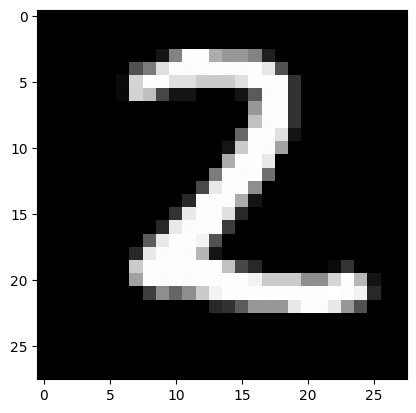

In [161]:
index = 101
test_prediction(index)

In [155]:
load_weights('weights.npy')

Weight loaded


In [27]:
np.array_equal(ann.parameters['W1'], weights.item().get('W1'))  

True